In [8]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import scvelo as scv
import numpy as np

Read the human marrow data for velocity computing from h5ad format
The dataset is from https://ndownloader.figshare.com/files/27686835

In [9]:
human_marrow = sc.read_h5ad("./human_cd34_bone_marrow.h5ad")

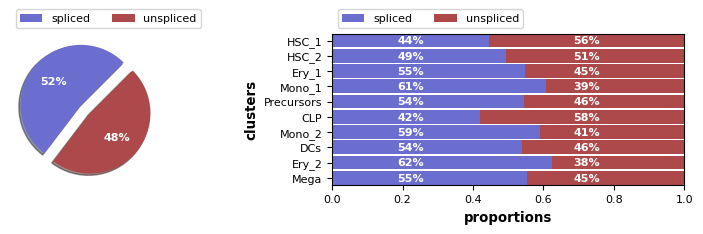

In [10]:
scv.pl.proportions(human_marrow)

Getting information of the structure of our dataset

In [11]:
human_marrow

AnnData object with n_obs × n_vars = 5780 × 14319
    obs: 'clusters', 'palantir_pseudotime'
    uns: 'clusters_colors'
    obsm: 'X_tsne'
    layers: 'spliced', 'unspliced'

In [12]:
human_marrow.obs["clusters"]

index
Run4_120703408880541         Ery_1
Run4_120703409056541         HSC_1
Run4_120703409580963        Mono_1
Run4_120703423990708        Mono_1
Run4_120703424252854    Precursors
                           ...    
Run5_241114589051630         Ery_2
Run5_241114589051819         HSC_2
Run5_241114589128940    Precursors
Run5_241114589357942         Ery_2
Run5_241114589841822    Precursors
Name: clusters, Length: 5780, dtype: category
Categories (10, object): ['HSC_1', 'HSC_2', 'Ery_1', 'Mono_1', ..., 'Mono_2', 'DCs', 'Ery_2', 'Mega']

If you want to take a look at the count matrix, we must transform X data to count matrix as bellow. I chose to do transpose since it has more nature view (cells as columns and genes as rows)

In [13]:
counts = pd.DataFrame(human_marrow.X.todense().transpose(), index=human_marrow.var_names, columns=human_marrow.obs_names)

In [14]:
human_marrow.obs_names

Index(['Run4_120703408880541', 'Run4_120703409056541', 'Run4_120703409580963',
       'Run4_120703423990708', 'Run4_120703424252854', 'Run4_120703436053366',
       'Run4_120703436057910', 'Run4_120703436876077', 'Run4_120703455025387',
       'Run4_120726911638237',
       ...
       'Run5_241106389756316', 'Run5_241106389784372', 'Run5_241106401770805',
       'Run5_241114577000174', 'Run5_241114577004764', 'Run5_241114589051630',
       'Run5_241114589051819', 'Run5_241114589128940', 'Run5_241114589357942',
       'Run5_241114589841822'],
      dtype='object', name='index', length=5780)

The count matrix data

In [15]:
counts

index,Run4_120703408880541,Run4_120703409056541,Run4_120703409580963,Run4_120703423990708,Run4_120703424252854,Run4_120703436053366,Run4_120703436057910,Run4_120703436876077,Run4_120703455025387,Run4_120726911638237,...,Run5_241106389756316,Run5_241106389784372,Run5_241106401770805,Run5_241114577000174,Run5_241114577004764,Run5_241114589051630,Run5_241114589051819,Run5_241114589128940,Run5_241114589357942,Run5_241114589841822
index,,,,,,,,,,,,,,,,,,,,,
FO538757.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP4-669L17.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC00115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM41C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDX3Y,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0
TMSB4Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
FAM224A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This following data is special. It is different from other usual scRNAseq datasets. It has information of spliced and unspliced matrices. The ideas are that ploripotent cells has less spliced genes than terminal cells where it has largest spliced amount.

In [16]:
spliced_seq = pd.DataFrame(human_marrow.layers["spliced"].todense(), index = human_marrow.obs_names, columns=human_marrow.var_names)

In [17]:
spliced_seq.iloc[[2]]

index,FO538757.1,AP006222.2,RP4-669L17.10,LINC00115,FAM41C,RP11-54O7.3,NOC2L,HES4,RNF223,TNFRSF18,...,AC010084.1,PCDH11Y,TBL1Y,TTTY15,USP9Y,DDX3Y,TMSB4Y,FAM224A,EIF1AY,RPS4Y2
index,,,,,,,,,,,,,,,,,,,,,
Run4_120703409580963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Next, we are going to use scvelo to study the trajectory and velocity of cell development. First thing first, import the scvelo package.

We need to do some QC for our data. Here, I choose to use the automatic work from filter_and_normalize function from scvelo

In [18]:
scv.pp.filter_and_normalize(human_marrow)

Normalized count data: X, spliced, unspliced.
Logarithmized X.


RNA velocity estimation can currently be tackled with three existing approaches:

   + steady-state / deterministic model (using steady-state residuals)
   + stochastic model (using second-order moments),
   + dynamical model (using a likelihood-based framework).


We are going to use stochastic model, so we compute the moments first

In [19]:
scv.pp.moments(human_marrow)

computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


And the velocity computing

In [20]:
scv.tl.velocity(human_marrow, mode='stochastic')

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


Getting the graph of velocity

In [21]:
scv.tl.velocity_graph(human_marrow)

computing velocity graph (using 1/12 cores)
or disable the progress bar using `show_progress_bar=False`.


/home/phile-ubuntu/miniconda3/lib/python3.8/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:25) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


Because I want to present our results in the UMAP projection, we need to have UMAP coordinates

In [22]:
sc.tl.umap(human_marrow)

And I want to make clusters by using Leiden algorithm

In [24]:
sc.tl.leiden(human_marrow)

We get more data from human_marrow since the first time. Here are the information from what we did

In [25]:
human_marrow

AnnData object with n_obs × n_vars = 5780 × 14319
    obs: 'clusters', 'palantir_pseudotime', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'leiden'
    var: 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_colors', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'umap', 'leiden'
    obsm: 'X_tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

It is time to take a look at the clusters we made. The UMAP projection looks good.

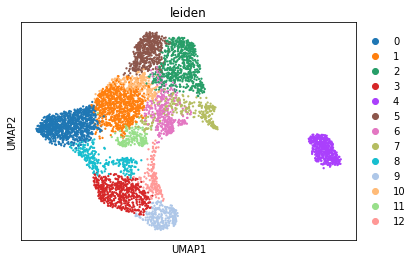

In [26]:
sc.pl.umap(human_marrow, color="leiden")

Get the information of trajectory and velocity of cell development

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


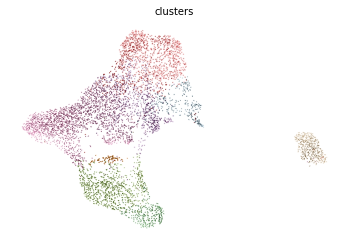

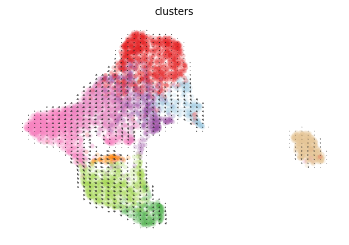

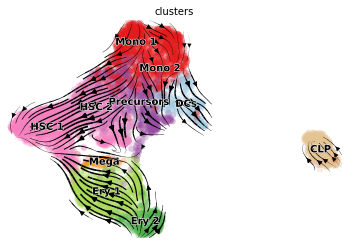

In [27]:

scv.pl.velocity_embedding(human_marrow, basis='umap')
scv.pl.velocity_embedding_grid(human_marrow, basis='umap')
scv.pl.velocity_embedding_stream(human_marrow, basis='umap')

We can calculate the latent time of the changing of the development

recovering dynamics (using 1/12 cores)


/home/phile-ubuntu/miniconda3/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/phile-ubuntu/miniconda3/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:08:02) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 3 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:02) --> added 
    'latent_time', shared time (adata.obs)


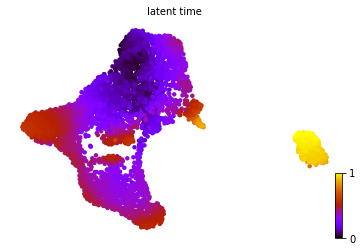

In [28]:
scv.tl.recover_dynamics(human_marrow)
scv.tl.latent_time(human_marrow)
scv.pl.scatter(human_marrow, color='latent_time', color_map='gnuplot', size=80)

If you want to see the changing by genes of the trajectory

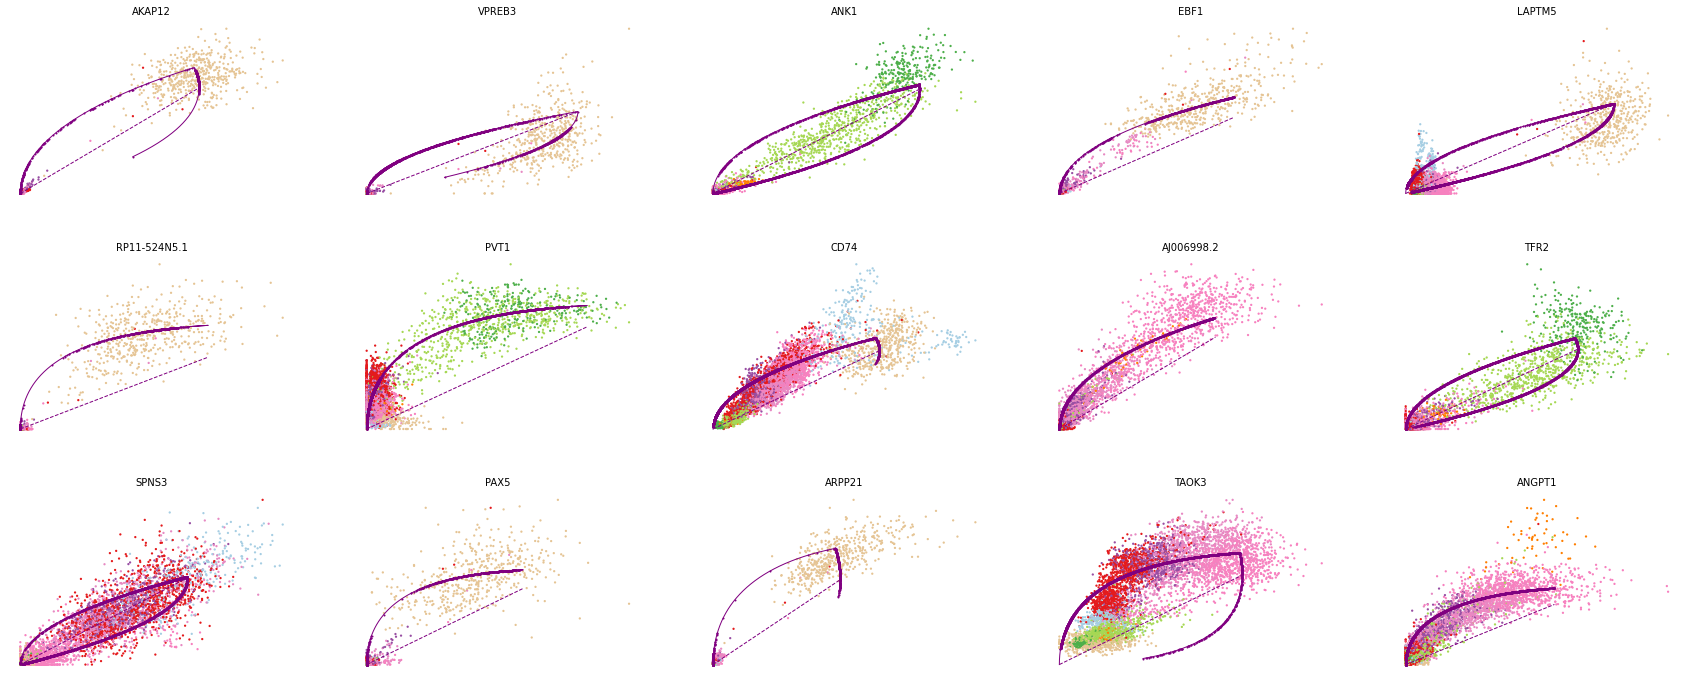

In [29]:
top_genes = human_marrow.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(human_marrow, basis=top_genes[:15], ncols=5, frameon=False)



Cellrank for trajectory+velocity analysis

In [30]:
scv.tl.recover_dynamics(human_marrow, n_jobs=8)


recovering dynamics (using 8/12 cores)
    finished (0:02:43) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/home/phile-ubuntu/miniconda3/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/phile-ubuntu/miniconda3/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


In [31]:
scv.tl.velocity(human_marrow, mode="dynamical")
scv.tl.velocity_graph(human_marrow)

computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


/home/phile-ubuntu/miniconda3/lib/python3.8/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:16) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


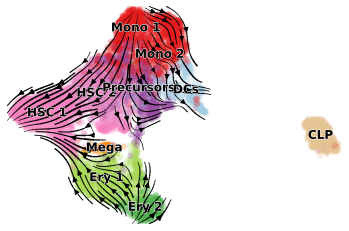

In [32]:
scv.pl.velocity_embedding_stream(
    human_marrow, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4
)


Find terminal stage

In [33]:
import cellrank as cr

In [34]:

cr.tl.terminal_states(human_marrow, cluster_key="clusters", weight_connectivities=0.2)

/tmp/ipykernel_1169/979597353.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.terminal_states(human_marrow, cluster_key="clusters", weight_connectivities=0.2)
/home/phile-ubuntu/miniconda3/lib/python3.8/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(
100%|██████████| 5780/5780 [00:03<00:00, 1468.90cell/s]


Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999722e-01 -7.7501927340183647e-03 
0.0000000000000000e+00 9.9682979973947716e-01 
0.0000000000000000e+00 0.0000000000000000e+00 
Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999767e-01 -7.7501927340185616e-03 -6.2423827597931497e-03 2.5415109512178655e-02 
0.0000000000000000e+00 9.9682979973947716e-01 1.3520739647291855e-03 1.1459541107621254e-02 
0.0000000000000000e+00 0.0000000000000000e+00 9.7681288426783219e-01 2.1678790063786136e-02 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.6147567756587271e-01 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 


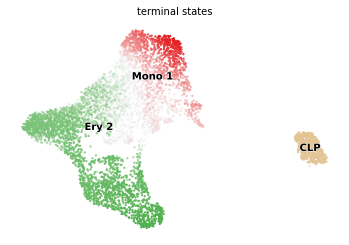

In [35]:
cr.pl.terminal_states(human_marrow)

Identify initial state

/tmp/ipykernel_1169/1700176064.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.initial_states(human_marrow, cluster_key="clusters")
/home/phile-ubuntu/miniconda3/lib/python3.8/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(
100%|██████████| 5780/5780 [00:06<00:00, 909.12cell/s]
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: 

Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000018e+00 2.1716772476771317e-03 5.1268023826768082e-04 -2.0923603849775643e-03 
0.0000000000000000e+00 9.9895967814804920e-01 -1.1487295366403212e-03 -6.9813258404683503e-03 
0.0000000000000000e+00 0.0000000000000000e+00 9.9590718360561648e-01 1.6436237535964494e-03 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.8471313255097337e-01 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 


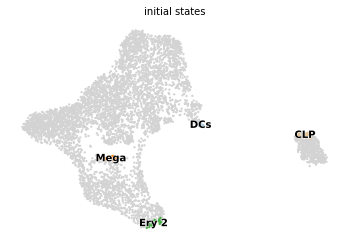

In [36]:
cr.tl.initial_states(human_marrow, cluster_key="clusters")
cr.pl.initial_states(human_marrow, discrete=True)


/tmp/ipykernel_1169/4166141101.py:1: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.lineages(human_marrow)
100%|██████████| 3/3 [00:00<00:00, 20.51/s]
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple Mac OS X to find memory corruption errors


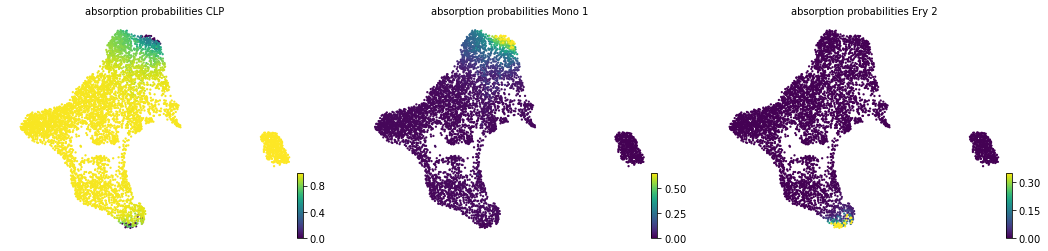

In [38]:
cr.tl.lineages(human_marrow)
cr.pl.lineages(human_marrow, same_plot=False)


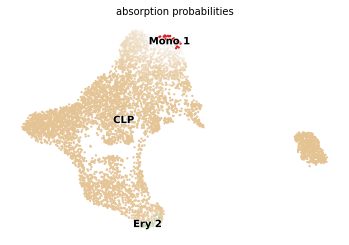

In [40]:
cr.pl.lineages(human_marrow, same_plot=True)


In [41]:
scv.tl.recover_latent_time(
    human_marrow, root_key="initial_states_probs", end_key="terminal_states_probs"
)


computing latent time using initial_states_probs, terminal_states_probs as prior
    finished (0:00:03) --> added 
    'latent_time', shared time (adata.obs)


In [42]:
scv.tl.paga(
    human_marrow,
    groups="clusters",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="velocity_pseudotime",
)


running PAGA using priors: ['velocity_pseudotime', 'initial_states_probs', 'terminal_states_probs']
    finished (0:00:03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


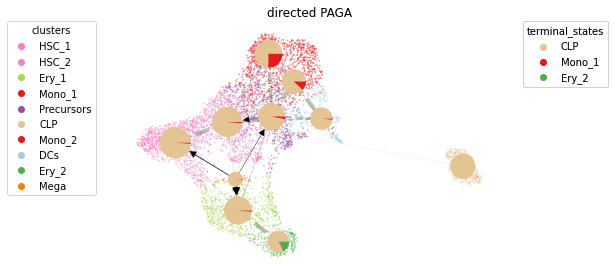

In [43]:
cr.pl.cluster_fates(
    human_marrow,
    mode="paga_pie",
    cluster_key="clusters",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=5,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA",
)